In [1]:
# Import of the library and loading of the data
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from datetime import date
pd.options.mode.chained_assignment = None 

df = pd.read_csv('../data/Surgery_Data.csv')

In [2]:
# Getting the date column fix, with extreme and corection in the dataset
def get_data(data):
    if isinstance(data, str):
        return data.split(' ')[0]
    return data

df['PREAUTH_DATE'] = pd.to_datetime(df['PREAUTH_DATE'].apply(get_data),format='%d/%m/%Y')
df['CLAIM_DATE'] = pd.to_datetime(df['CLAIM_DATE'].apply(get_data),format='%d/%m/%Y')
df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'].apply(get_data),format='%d/%m/%Y', errors = 'coerce')
df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'].apply(get_data),format='%d/%m/%Y')
df['MORTALITY_DATE'] = pd.to_datetime(df['MORTALITY_DATE'].apply(get_data),format='%d/%m/%Y')

df['MORTALITY_DATE'].fillna(value=pd.to_datetime('2000-01-01'), inplace=True) 

In [3]:
# df['PREAUTH_DATE'].unique() '3/8/2013 20:38'
#df['CLAIM_DATE'].unique() 22/03/2017 20:25:18
#df['DISCHARGE_DATE'].unique() 7/9/2013 0:00
#df['MORTALITY_DATE'].unique() 23/05/2014 00:00:00
df[['PREAUTH_DATE','CLAIM_DATE','DISCHARGE_DATE','MORTALITY_DATE','SURGERY_DATE']].head()

,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE,MORTALITY_DATE,SURGERY_DATE
0,2013-08-03,2017-03-22,2013-09-07,2000-01-01,2013-08-06
1,2013-08-06,2017-03-22,2013-09-09,2000-01-01,2013-08-08
2,2013-08-09,2017-03-22,2013-10-18,2000-01-01,2013-08-15
3,2013-08-24,2017-03-22,2013-09-27,2000-01-01,2013-08-24
4,2013-08-28,2017-03-22,2013-10-02,2000-01-01,2013-08-31


In [4]:
df.columns

Index(['Patient_ID', 'AGE', 'SEX', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT', 'HOSP_TYPE', 'HOSP_NAME',
       'HOSP_LOCATION', 'HOSP_DISTRICT', 'SURGERY_DATE', 'DISCHARGE_DATE',
       'Mortality Y / N', 'MORTALITY_DATE', 'SRC_REGISTRATION'],
      dtype='object')

In [5]:
df.isnull().sum()

Patient_ID           0
AGE                  0
SEX                  0
CATEGORY_CODE        0
CATEGORY_NAME        0
SURGERY_CODE         0
SURGERY              0
VILLAGE              0
DISTRICT_NAME        0
PREAUTH_DATE         0
PREAUTH_AMT          0
CLAIM_DATE           0
CLAIM_AMOUNT         0
HOSP_TYPE            1
HOSP_NAME            0
HOSP_LOCATION        0
HOSP_DISTRICT        0
SURGERY_DATE         0
DISCHARGE_DATE      88
Mortality Y / N      0
MORTALITY_DATE       0
SRC_REGISTRATION     1
dtype: int64

In [6]:
df[df['HOSP_TYPE'].isnull()]

,Patient_ID,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,DISTRICT_NAME,PREAUTH_DATE,...,CLAIM_AMOUNT,HOSP_TYPE,HOSP_NAME,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
89999,90000,48,Female,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Mukkellapadu,Guntur,2016-11-03,...,2000,NaN,Guntur Cancer Care Centre Limited,GUNTUR,Guntur,2016-11-04,2016-11-05,NO,2000-01-01,NaN


In [7]:
df['HOSP_TYPE'].loc[(df['HOSP_TYPE'].isnull())] = '0'

In [8]:
# fill the value of the null to other as 'O'
df['HOSP_TYPE'].unique()

array(['G', 'C', '0'], dtype=object)

In [9]:
# Remaining colums to treat
df.columns[df.isnull().mean()>0]

Index(['DISCHARGE_DATE', 'SRC_REGISTRATION'], dtype='object')

In [10]:
df['SRC_REGISTRATION'].unique()

array(['D', 'P', 'MC', 'CMO', nan], dtype=object)

In [11]:
df['SRC_REGISTRATION'].loc[(df['SRC_REGISTRATION'].isnull())] = '0'

In [12]:
# Remaining colums to treat
df.columns[df.isnull().mean()>0]

Index(['DISCHARGE_DATE'], dtype='object')

In [13]:
df[df['DISCHARGE_DATE'].isnull()].head(1)

,Patient_ID,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,DISTRICT_NAME,PREAUTH_DATE,...,CLAIM_AMOUNT,HOSP_TYPE,HOSP_NAME,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
7,8,73,Male,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Vizianagaram,2014-05-02,...,5000,C,Queens Nri Hospitals,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D


In [14]:
df.columns

Index(['Patient_ID', 'AGE', 'SEX', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT', 'HOSP_TYPE', 'HOSP_NAME',
       'HOSP_LOCATION', 'HOSP_DISTRICT', 'SURGERY_DATE', 'DISCHARGE_DATE',
       'Mortality Y / N', 'MORTALITY_DATE', 'SRC_REGISTRATION'],
      dtype='object')

In [15]:
tmp = df[df['SURGERY_DATE'].notnull() & df['DISCHARGE_DATE'].notnull()]

In [16]:
tmp['diff'] = pd.to_datetime(tmp.DISCHARGE_DATE) - pd.to_datetime(tmp.SURGERY_DATE)

In [17]:
#tmp[tmp['diff']>=-320]
tmp[tmp['diff'] > timedelta(days=600)].head(1)

,Patient_ID,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,DISTRICT_NAME,PREAUTH_DATE,...,HOSP_TYPE,HOSP_NAME,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,diff
87,88,58,Male,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Padamati Kambhampadu,Nellore,2015-03-06,...,C,ABHIRAM INSTITUTE OF MEDICAL SCIENCES,NELLORE,Nellore,2015-03-07,2016-11-04,NO,2000-01-01,D,608 days


In [18]:
tmp[tmp['SURGERY_DATE']==tmp['DISCHARGE_DATE']]

,Patient_ID,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,DISTRICT_NAME,PREAUTH_DATE,...,HOSP_TYPE,HOSP_NAME,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,diff
134,135,0,Female(Child),M4,PEDIATRICS,M4.1.6,Medical management of Preterm baby of 33 To 34...,Ananthapuram,YSR Kadapa,2015-06-29,...,G,Rims General Hospital,KADAPA,YSR Kadapa,2015-06-29,2015-06-29,YES,2015-06-29,D,0 days
140,141,35,Male,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Vidavalur,Nellore,2015-07-08,...,G,M.N.J.Hospitals,HYDERABAD,Hyderabad,2017-01-21,2017-01-21,NO,2000-01-01,CMO,0 days
155,156,50,Male,M12,GASTROENTEROLOGY,M12.13,Conservative management of Chronic Pancreatiti...,Vizianagaram Bit-I,Vizianagaram,2015-07-30,...,G,King George Hospital,VISAKHAPATNAM,Vishakhapatnam,2015-08-01,2015-08-01,NO,2000-01-01,D,0 days
166,167,19,Female,M10,RHEUMATOLOGY,M10.1,Medical management of SLE (Systemic Lupus Ery...,Marlava,East Godavari,2015-08-08,...,G,King George Hospital,VISAKHAPATNAM,Vishakhapatnam,2015-08-12,2015-08-12,NO,2000-01-01,D,0 days
169,170,14,Female(Child),M10,RHEUMATOLOGY,M10.1,Medical management of SLE (Systemic Lupus Ery...,Rangampeta,East Godavari,2015-08-11,...,G,King George Hospital,VISAKHAPATNAM,Vishakhapatnam,2015-08-12,2015-08-12,NO,2000-01-01,D,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89965,89966,1,Female(Child),M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Nandyal,Kurnool,2016-11-07,...,G,District Hospital - Nandyal,Kurnool,Kurnool,2016-11-07,2016-11-07,NO,2000-01-01,D,0 days
89975,89976,18,Male,S12,MEDICAL ONCOLOGY,S12.27.1.3,Chemotherapy for Acute Lymphoblastic Leukemia ...,Kapileswarapuram,East Godavari,2016-11-04,...,G,M.N.J.Hospitals,HYDERABAD,Hyderabad,2016-11-04,2016-11-04,NO,2000-01-01,D,0 days
89981,89982,63,Male,S12,MEDICAL ONCOLOGY,S12.28.1,Palliative Chemotherapy for unlisted Regimen,12th Ward,Chittoor,2016-11-08,...,G,Sri Venkateswara Institute Of Medical Sciences,TIRUPATHI,Chittoor,2016-11-10,2016-11-10,NO,2000-01-01,D,0 days
89985,89986,60,Female,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Dandigunta,Nellore,2016-11-04,...,C,Ircs Cancer Hospital Indian Red Cross Society ...,NELLORE,Nellore,2016-11-05,2016-11-05,NO,2000-01-01,D,0 days


In [19]:
#df[df['DISCHARGE_DATE'].isnull()]
#df['DISCHARGE_DATE'].min() - timedelta(days=600)
df['DISCHARGE_DATE'].fillna(value=pd.to_datetime('2000-01-01'), inplace=True) 

In [20]:
#df[['PREAUTH_DATE','CLAIM_DATE','DISCHARGE_DATE','MORTALITY_DATE']].head()

In [21]:
# We have fix everything in the dataset
df.isnull().sum()

Patient_ID          0
AGE                 0
SEX                 0
CATEGORY_CODE       0
CATEGORY_NAME       0
SURGERY_CODE        0
SURGERY             0
VILLAGE             0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_TYPE           0
HOSP_NAME           0
HOSP_LOCATION       0
HOSP_DISTRICT       0
SURGERY_DATE        0
DISCHARGE_DATE      0
Mortality Y / N     0
MORTALITY_DATE      0
SRC_REGISTRATION    0
dtype: int64

In [49]:
df['diff'] = (pd.to_datetime(cdf.DISCHARGE_DATE) - pd.to_datetime(cdf.SURGERY_DATE)).dt.days

# Company also needs to submit report to district level hospital to show distribution of patient undergone surgeries of different category to know prevalence of disease and mortality rate in percentage based on gender. 

In [22]:
df['Mortality_Flag'] = 0
## not working, df['Mortality_Flag'].loc[(df['Mortality Y / N'] =='N0')] = 0
df['Mortality_Flag'].loc[(df['Mortality Y / N'] == 'YES')] = 1
df['percent'] = (df['Mortality_Flag']/df.groupby(['DISTRICT_NAME', 'HOSP_NAME', 'SURGERY','SEX'])['Mortality_Flag'].transform('sum'))*100
df['percent'].loc[(df['percent'].isnull())] = 0

tmp = df.groupby(['DISTRICT_NAME', 'HOSP_NAME', 'SURGERY','SEX']).agg(Mortality=('percent', 'max')).sort_values('DISTRICT_NAME')

In [23]:
#df[df['percent'].isnull()]
#df['Mortality Y / N'].unique()
#df.groupby(['DISTRICT_NAME', 'HOSP_NAME', 'SURGERY','SEX'])['Mortality_Flag'].sum()#.transform('sum')
#df['Mortality_Flag'].unique()

In [24]:
tmp['Mortality'].unique()

array([  0.        , 100.        ,  33.33333333,   5.55555556,
        20.        ,   7.14285714,  14.28571429,  50.        ,
         8.33333333,  25.        ,  12.5       ,  16.66666667,
         4.54545455,   6.66666667,  11.11111111,  10.        ,
         4.34782609,   5.88235294,   6.25      ,   2.63157895,
         3.57142857,   2.08333333,   5.        ,   9.09090909,
         4.76190476,   3.7037037 ,   7.69230769,   3.22580645])

## Company wants to understand duration of patient’s hospitalization stay and mortality rate for cardiology surgery across corporate and government hospital to improve quality of hospital care.


In [25]:
df.CATEGORY_NAME.unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES'],
      dtype=object)

In [26]:
cdf = df[df['CATEGORY_NAME'] =='CARDIOLOGY']

In [27]:
cdf[['PREAUTH_DATE','CLAIM_DATE','DISCHARGE_DATE','MORTALITY_DATE','SURGERY_DATE']].head()

,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE,MORTALITY_DATE,SURGERY_DATE
11,2014-07-04,2017-02-17,2014-07-09,2000-01-01,2014-07-04
12,2014-07-09,2017-02-17,2014-07-16,2000-01-01,2014-07-08
13,2014-07-10,2017-02-17,2014-07-19,2000-01-01,2014-07-10
14,2014-07-13,2017-02-17,2014-07-19,2000-01-01,2014-07-13
15,2014-07-16,2017-02-17,2014-07-21,2000-01-01,2014-07-15


In [28]:
#cdf.drop(cdf['DISCHARGE_DATE']==pd.to_datetime('1/1/2000'), axis=1) #MORTALITY_DATE
cdf.drop(cdf[cdf['DISCHARGE_DATE']==pd.to_datetime('2000-01-01')].index, inplace=True)
cdf.drop(cdf[cdf['MORTALITY_DATE']==pd.to_datetime('2000-01-01')].index, inplace=True)

In [29]:
cdf['diff'] = (pd.to_datetime(cdf.DISCHARGE_DATE) - pd.to_datetime(cdf.SURGERY_DATE)).dt.days

In [30]:
cmax = cdf['diff'].max()
cmin = cdf['diff'].min()
print(cmax)
print(cmin)
print('--')
def range_func(diff):
    start = cmin-5
    for i in range(cmin,cmax+5,5):
        ragen_str = 'range_{}_to_{}'.format(start, i-1)
        start = i
        if diff.days >0:
            pass

33
-3
--


In [31]:
#cdf['diff'].apply(range_func)
#cdf['diff'] = cdf['diff'].days
dir(cdf['diff'])
type(cdf['diff'].iloc[0])

numpy.int64

In [32]:
cdf[['SURGERY_DATE','DISCHARGE_DATE','diff']].shape

(254, 3)

In [33]:
cdf['Mortality_Flag'] = 0
cdf['Mortality_Flag'].loc[(cdf['Mortality Y / N'] == 'YES')] = 1
cdf['percent'] = (cdf['Mortality_Flag']/cdf.groupby(['HOSP_TYPE','diff'])['Mortality_Flag'].transform('sum'))*100
cdf['percent'].loc[(cdf['percent'].isnull())] = 0

In [34]:
tmp = cdf.groupby(['HOSP_TYPE', 'diff']).agg(Mortality=('percent', 'max')).sort_values('diff')

In [35]:
diff_by_range = pd.cut(cdf['diff'], bins=range(-5,40,5), \
                         right=False,labels=['-5_0_days','0_5_days','5_10_days','10_20_days','20_25_days',
                                             '25_30_days','30_35_days','35_40_days'])

In [36]:
cdf['diff_by_range'] = diff_by_range

In [37]:
tmp = cdf.groupby(['HOSP_TYPE', 'diff_by_range']).agg(Mortality=('percent', 'max')).sort_values('HOSP_TYPE')
tmp['Mortality'].loc[(tmp['Mortality'].isnull())] = 0

In [38]:
tmp

Mortality
HOSP_TYPE diff_by_range            
C         -5_0_days      100.000000
          0_5_days         5.263158
          5_10_days       25.000000
          10_20_days     100.000000
          20_25_days     100.000000
          25_30_days     100.000000
          30_35_days       0.000000
          35_40_days     100.000000
G         -5_0_days      100.000000
          0_5_days        50.000000
          5_10_days      100.000000
          10_20_days     100.000000
          20_25_days       0.000000
          25_30_days       0.000000
          30_35_days       0.000000
          35_40_days       0.000000

## Company wants to identify most common source of registration through which patients got registered for surgeries across different hospitals to improve marketing strategy of hospitals

In [39]:
df.isnull().sum()

Patient_ID          0
AGE                 0
SEX                 0
CATEGORY_CODE       0
CATEGORY_NAME       0
SURGERY_CODE        0
SURGERY             0
VILLAGE             0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_TYPE           0
HOSP_NAME           0
HOSP_LOCATION       0
HOSP_DISTRICT       0
SURGERY_DATE        0
DISCHARGE_DATE      0
Mortality Y / N     0
MORTALITY_DATE      0
SRC_REGISTRATION    0
Mortality_Flag      0
percent             0
dtype: int64

D      77876
CMO     6280
P       4326
MC      1517
0          1
Name: SRC_REGISTRATION, dtype: int64


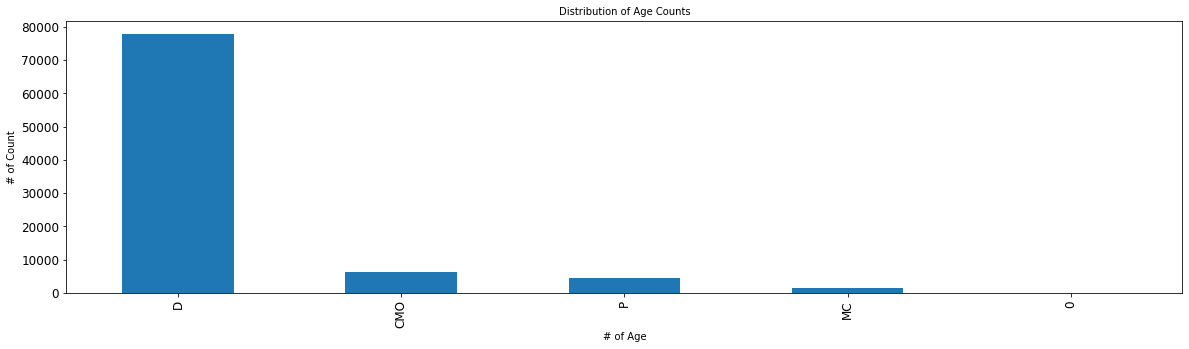

In [40]:
df['SRC_REGISTRATION']
df['SRC_REGISTRATION'].value_counts().sort_values(ascending=False).plot.bar(figsize=(20,5), fontsize=12);
plt.xlabel('# of Age', fontsize=10)
plt.ylabel('# of Count', fontsize=10)
plt.title('Distribution of Age Counts', fontsize=10)

print(df['SRC_REGISTRATION'].value_counts().sort_values(ascending=False))

## District level hospital needs to submit patient details to insurance company, the Medi-life company needs to generate PDF files having details of each patient about its tenure in hospital, claims details, surgery details, hospital info on daily basis.

In [58]:
for patient_id in df['Patient_ID']:
    record_df = df[df['Patient_ID']==patient_id]
    record_df['diff'] = pd.to_datetime(record_df.DISCHARGE_DATE) - pd.to_datetime(record_df.SURGERY_DATE)
    amount = record_df['CLAIM_AMOUNT'].sum()
    surgery_details = record_df['SURGERY']
    print(record_df)
    print(amount)
    print(record_df['CLAIM_AMOUNT'])
    print(surgery_details)
    break

   Patient_ID  AGE     SEX CATEGORY_CODE CATEGORY_NAME SURGERY_CODE  \
0           1   56  Female            M6    NEPHROLOGY         M6.5   

                            SURGERY VILLAGE DISTRICT_NAME PREAUTH_DATE  ...  \
0  Maintenance Hemodialysis For Crf  Lolugu    Srikakulam   2013-08-03  ...   

   HOSP_LOCATION HOSP_DISTRICT  SURGERY_DATE DISCHARGE_DATE Mortality Y / N  \
0     SRIKAKULAM    Srikakulam    2013-08-06     2013-09-07              NO   

  MORTALITY_DATE SRC_REGISTRATION Mortality_Flag percent    diff  
0     2000-01-01                D              0     0.0 32 days  

[1 rows x 25 columns]
11000
0    11000
Name: CLAIM_AMOUNT, dtype: int64
0    Maintenance Hemodialysis For Crf
Name: SURGERY, dtype: object


## Company wants to generate monthly report based on revenue of each hospital and number patients admitted across different district with respect to different surgery category type for hospital financial analysis.

In [59]:
df

,Patient_ID,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,DISTRICT_NAME,PREAUTH_DATE,...,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,Mortality_Flag,percent,diff
0,1,56,Female,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Srikakulam,2013-08-03,...,SRIKAKULAM,Srikakulam,2013-08-06,2013-09-07,NO,2000-01-01,D,0,0.0,NaN
